# The DMCBH Open Science Initiative

The goal of our Open Science Initiative is to establish local support for, and a framework leading to, the transformation of the UBC Djavad Mowafaghian Centre for Brain Health into an Open Science Institute modelled after the pioneering example of the McGill Neurological Institute (MNI). Developing and adapting open science principles to suit the unique needs of our Centre necessitates collecting information on attitudes, behaviours and perceived norms, as they pertain to open science, from everyone in our research community - faculty, staff and students.  In complement to the focus groups and interviews we have been conducting with you, we have provided a script below to enable the conversion of the corresponding metadata for optical physiology experiments in a standardized NWB format. NWB (Neurodata Without Borders) is a data standard which enables neuroscientists to share and use analysis tools for neurophysiology data to break down barriers in data sharing.

<div>
<img src="https://pbs.twimg.com/profile_images/1133961932950532096/15M5Fvdy_400x400.png" width="200" height="200"/>
</div>

Additional Note: This script is modelled after the ophys_tutorial.ipynb found in the PyNWB documentation provided by Neurodata Without Borders.
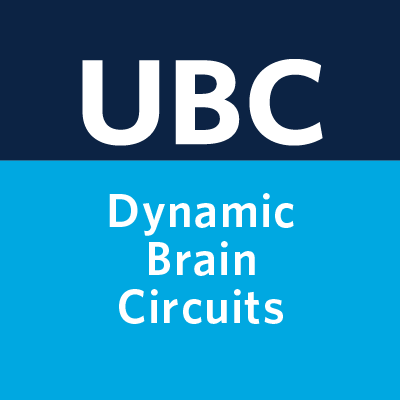

# Augmenting Metadata To an NWB File 

The following script is meant to demonstrate how to augment metadata to a Neurodata Without Borders (https://www.nwb.org) file format (a more standardized way of storing raw and processed neuroscience data).
Executing this script will allow you to add metadata to an nwb file that has been generated with a data analysis/visualization tool.

You can use the following script assuming that you have done the steps below:

<ul><li>Images have been recorded and scanned correctly with spatial calibration (with a two-photon microscope).</li>

<li>The .tiff format files have then been imported and analyzed with suite2p* which produces an NWB file.</li>

<li>Therefore, the NWB file created by suite2p can now be loaded and its corresponding metadata can be added by following the script below.</ul>

*Additional note on using suite2p:
If you are interested in using suite2p for calcium imaging analysis please refer to the link posted below which provides further documentation on the use of suite2p: <br>
https://suite2p.readthedocs.io/en/latest/_modules/suite2p/io/nwb.html

# Installation Requirements

Prior to being able to do so, it is important to have Python 3.5+ installed on your computer (if running code on your own computer).
Once you have python installed, you can install PyNWB by copy/pasting either of the following commands onto your terminal. PyNWB is a python package with enables working with NWB files. Please note that if you are using syzygy to execute this script the following line of code should successfully install pynwb.


In [ ]:
# pip install pynwb #for pip install
# conda install -c conda-forge pynwb #for conda environment if running on your computer
!conda install -c conda-forge pynwb -y

# Loading in NWB File Created from Suite2p

In order to add relevant metadata information about the NWB file created, you must read the file, add components, and then write back to the file. When loading in the nwb file, the "mode constructor" must be set to 'a' which indicates that we want to add relevant metadata.

Please note that you must include the file path in order to be able to successfully load in the nwb file.
Example of sample file path if using linux: '/Users/sayeholoumi/Desktop/suite2p/ophys.nwb' if file ophys.nwb was stored in the suite2p folder on the Desktop. Example of sample file path if using windows: 'C:\Users\sayeholoumi\Desktop\suite2p\ophys.nwb.'

The following code segment below indicates how to do so with the assumption that you are using syzygy and have uploaded your nwb file in the same folder as the script you are executing:

In [ ]:
from pynwb import NWBHDF5IO

io = NWBHDF5IO('ophys.nwb', mode='a')
nwbfile = io.read()

Now that you have loaded in the nwb file, you can add in the relevant metadata. Prior to doing so you can
check the fields that suite2p has previously filled in for the nwbfile created.

In [ ]:
print(nwbfile)

In order to view the specifications of each field you can use the following command: <br>

`nwbfile.get_(name of field you want to view)`

You can do so for the following fields: acquistion, device, imaging_plane, processing_module.
Note that you use the above command for when the fields are part of an NWB defined class.

The rest of the parameters that are set by suite2p can be viewed by using the following command: <br>

`nwbfile.(name of param you want to view)`

Below are code segments which show you examples of how to do so:

In [ ]:
print(nwbfile.get_acquisition())
print(nwbfile.get_imaging_plane())

In [ ]:
print(nwbfile.session_description)
print(nwbfile.identifier)
print(nwbfile.session_start_time)

In order to view the parameters which are specific to the fields you are viewing (those that are part of an NWB defined class), you can do so by executing the following command:

In [ ]:
print(nwbfile.get_acquisition().device)
print(nwbfile.get_imaging_plane().excitation_lambda)

Please note that if you are content with the parameters filled out by suite2p, you do not have to alter them as you continue to execute the code laid out in the script below. However, you have the option of altering incorrect parameters as shown by the current excitation wavelength stored in the nwbfile.

# Adding Information to an NWB File Object

An NWB file (such as the one you have already loaded) must have the following three specifications: session description, identifier, and session start time. You cannot change these three specifications, but can change the other ones listed below. If you would like to change any of these fields, you must do so by executing the code below (and also setting additional parameters listed if you would like to). 

A list of all possible parameters for an NWB file: 

<ul>
 <li>experimenter (string) - name of person who carried out the experiment</li>
 <li>experiment_description (string) - description of the experiment</li>
 <li>lab (string) - name of lab</li>
 <li>institution (string) - name of institution </li>
 <li>session_id (string) - lab-specific ID for the session</li>
 <li>notes (string) – notes about the experiment.</li>
 <li>pharmacology (string) – sescription of drugs used, including how and when they were administered. Anesthesia(s), painkiller(s), etc., plus dosage, concentration, etc.</li>
 <li>protocol (string) – experimental protocol, if applicable. E.g., include IACUC protocol</li>
 <li>data_collection (string) –notes about data collection and analysis </li>
 <li>surgery (string) – narrative description about surgery/surgeries, including date(s) and who performed surgery </li>
 <li>virus (string) –information about virus(es) used in experiments, including virus ID, source, date made, injection location, volume, etc. </li>
 <li>stimulus_notes (string) – notes about stimuli, such as how and where presented</li>
</ul>


In [ ]:
nwbfile.experimenter = "my name"
nwbfile.experiment_description = "mouse cage experiment"
nwbfile.lab = "Murphy Lab"
nwbfile.institution = "UBC"
nwbfile.session_id = "session_1234"
nwbfile.notes = "mouse was sleepy"
nwbfile.pharmacology = "1% isoflurane gas was used for anesthesia"
nwbfile.protocol = "UBC ACUP A21-0207 iMAP Protocol"
nwbfile.data_collection = "data collected with a 2p microscope"
nwbfile.surgery = "Standard cranial window with Ti ring, 2022-02-20 by Pumin Wang"
print(nwbfile)

# Subject Information

A subject object contains information regarding the subject of the experiment such as its id, age, species, and sex.

<ul>
 <li>age (string) – the age of the subject (should be given using the ISO 8601 Duration format. (https://en.wikipedia.org/wiki/ISO_8601#Durations)</li> 
 <li>description (string) – a description of the subject</li> 
 <li>genotype (string) – the genotype of the subject, e.g., “Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt”</li>
 <li>sex (string) – the sex of the subject should be given as F(female), M(male), U(unknown), and O(other)</li> 
 <li>species (string) – the species of the subject. The formal latin binomal name is recommended, e.g., “Mus musculus” </li>
 <li>subject_id (string) – a unique identifier for the subject, e.g., “A10” </li>
 <li>weight (float or string) – the weight can be provided as a string or a number e.g., “0.02 kg”. If a number is  <li>provided it needs to be in kilograms </li> 
 <li>date_of_birth (datetime) – takes in a datetime: datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0)</li> 
 <li>strain (string) – the strain of the subject, e.g., “C57BL/6J” </li> 
</ul>
 
Please note that you are not required to provide information for all of these characteristics of the subject.
Below is a sample code segment which shows how one would do so.

In [ ]:
from pynwb.file import Subject
from datetime import datetime
from dateutil import tz

birthday = datetime(2016, 4, 25, 2, 30, 3, tzinfo=tz.gettz('US/Pacific'))

nwbfile.subject = Subject(
    subject_id='001',
    age='P90D', 
    description='mouse 5',
    genotype = 'tetO-GCaMP6s x CAMK tTA', 
    species='Mus musculus', 
    weight = 0.02,
    sex='M',
    date_of_birth = birthday,
    strain = 'C57BL/6J'
)

print(nwbfile.subject)

# Trials 

It is common to have to conduct multiple trials for an experiment; in such cases, you can use the following code to store certain information about your trials. Please note that you are not required to provide multiple trials

Trials are stored in a TimeIntervals object which is a subclass of DynamicTable. DynamicTable objects are used to store tabular metadata such as for trials and electrodes. They allow for required, optional, and custom columns.

An NWB file only requires trial start time and end time; however, additional columns can be added using add_trial_column.

The following code segment demonstrates how to do so when wanting to keep track of the times at which a certain type of order was presented to the mouse subject.

In [ ]:
nwbfile.add_trial_column(name='Odor', description='odor presented to mouse subject')
nwbfile.add_trial(start_time=1.0, stop_time=5.0, Odor = "odor1")
nwbfile.add_trial(start_time=6.0, stop_time=10.0, Odor = "odor2")

In [ ]:
nwbfile.add_trial_column(name='TimeOdorPresented', description = 'time at which odor was presented to mouse subject', data=[2.0, 7.0])

In [ ]:
nwbfile.add_trial_column(name='TimeOdorStopped', description = 'time at which odor was stopped', data=[4.0,9.0])

You can view the above information in the form of a table by converting it to a pandas dataframe:

In [ ]:
nwbfile.trials.to_dataframe()

# Writing Optical Physiology Results:

## Imaging Plane 

Please note that suite2p has already set an imaging plane object with a device and opticalchannel object.

If you are not content with any of the fields of the imaging plane object, you can change them by executing the code segment below which clears any previous imaging planes and enables you to create a new one with the correct specifications. Please note that it is important to use a different name for these parameters as shown below.

An Imaging Plane object will contain information regarding the area and method used to called imaging data. This requires making a Device and OpticalChannel object for the microscope.

First, we must create an ImagingPlane object, which will hold information about the area and method used to collect the optical imaging data. This first requires creation of a Device object for the microscope and an OpticalChannel object.


Parameters for creating an <b>imaging plane object: <br>
<ul>
<li>name (string) – the name of this container </li>
<li>optical_channel (list or OpticalChannel) – one of possibly many groups storing channel-specific data.<br>
<li>description (string) – description of this ImagingPlan.</li>
<li>device (Device) – the device that was used to record </li>
<li>excitation_lambda (float) – excitation wavelength in nm</li>
<li>indicator (string) – calcium indicator </li>
<li>location (string) – location of image plane </li>
<li>imaging_rate (float) – rate images are acquired, in Hz. If the corresponding TimeSeries is present, the rate should be stored there instead. </li>
<li>reference_frame (string) – describes position and reference frame of manifold based on position of first element in manifold. </li>
<li>origin_coords (ndarray or list) – physical location of the first element of the imaging plane (0, 0) for 2-D data or (0, 0, 0) for 3-D data. See also reference_frame for what the physical location is relative to (e.g., bregma) </li>
<li>origin_coords_unit (str) – measurement units for origin_coords. The default value is ‘meters’. </li>
<li>grid_spacing (ndarray or list) – space between pixels in (x, y) or voxels in (x, y, z) directions, in the specified unit. Assumes imaging plane is a regular grid. See also reference_frame to interpret the grid. </li>
<li>grid_spacing_unit (str) – measurement units for grid_spacing. The default value is ‘meters’. </li>
</ul>


Parameters for creating an <b>optical channel object: <br>
<ul>
<li>name (string) – the name of this electrode  </li>
<li>description (string) – any notes or comments about the channel.  </li>
<li>emission_lambda (float) – emission wavelength for channel, in nm.  </li>
</ul>


Parameters for creating a <b>device object: <br>
<ul>
<li>name (string) – the name of this device  </li>
<li>description (string) – description of the device (e.g., model, firmware version, processing software version, etc.)  </li>
<li>manufacturer (string) – the name of the manufacturer of this device  </li>
</ul>


In [ ]:
from pynwb.device import Device
from pynwb.ophys import OpticalChannel

nwbfile.imaging_planes.clear()

correct_device = nwbfile.create_device(
    name='2 photon microscope', 
    description='New model',
    manufacturer='Zeiss'
)

correct_optical_channel = OpticalChannel(
    name='GCaMPFluoresence2',
    description='an optical channel',
    emission_lambda=510. # emission peak of GCamp
)

correct_imaging_plane = nwbfile.create_imaging_plane(
    name='ImagingPlane2',
    optical_channel=correct_optical_channel,
    imaging_rate=30.,
    description='images of the olfactory bulb in the mouse brain',
    device=correct_device,
    excitation_lambda=920.,
    indicator='GCaMP',
    location='mouse olfactory bulb',
)

Please note that the code segment above can only be ran once as NWB is unforgiving when it comes to changing parameters that you have previously set. It is important for the names used for the device, optical channel, and the imaging plane to be different from the one previously defined by suite2p (as done so in the code above).

In [ ]:
nwbfile.imaging_planes

In [ ]:
nwbfile.get_imaging_plane().optical_channel

You can now write the changes you made back to the nwbfile.

In [ ]:
io.write(nwbfile)

The code segment below shows you how to read the NWB data you have just written to ensure that the changes have been made within the nwbfile.

In [ ]:
io = NWBHDF5IO('ophys.nwb', 'r')
nwbfile_in = io.read()

print(nwbfile_in.subject)

Once you are done adding data to this NWB file you can close it (with the changes saved as you have already written to it) by closing the IO you have been using.

In [ ]:
io.close()